<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/Copy_of_Copy_of_Copy_of_telematics_syn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Writing Code for the Paper: Step-by-Step Guide

> Step 1: Data Preparation
Load the dataset containing 100,000 data samples with 52 variables, including Traditional, Telematic, and Response Data

Categorize the features into relevant groups such as car age, total miles driven, and harsh driving events.
> Step 2: Data Pre-processing
Implement pre-processing steps including standardization, normalization, and feature engineering

Aggregate related harsh driving events to enhance feature engineering requirements.
> Step 3: Model Selection and Implementation
Choose the TabNet DL model for insurance risk pricing, known for its accuracy and model interpretability

Compare TabNet with traditional models like GLM and XGBoost for claim prediction using scoring metrics like F1-Score, Precision, Recall, AUC, and ROC

> Step 4: Training and Evaluation
Split the dataset into training and testing sets for model training and evaluation.
Train the TabNet model on the training data and evaluate its performance using metrics like F1-Score, Recall, and Matthew's Correlation Coefficient.
> Step 5: Model Interpretability
Explore the interpretability of the TabNet model by analyzing the importance of features and decision masks

Understand how the model makes decisions at both local and global levels for better insights into risk pricing.
> Step 6: Comparison with Traditional Models
Compare the performance of TabNet with XGBoost and Logistic Regression in terms of accuracy, interpretability, and computational efficiency

Highlight the strengths of TabNet in capturing sparsity in claims data and providing clear model decisions.
> Step 7: Hyperparameter Tuning
Fine-tune the hyperparameters of the TabNet model using techniques like RandomizedSearchCV with 10-fold-cross validation


Optimize the model parameters to achieve the best performance in terms of accuracy and interpretability.
> Step 8: Result Analysis and Conclusion
Analyze the results obtained from the TabNet model in comparison to traditional models.
Conclude by summarizing the advantages of using TabNet for insurance risk pricing, emphasizing its accuracy, interpretability, and insights into data trends

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('telematics_syn.csv')

# 1. Handling Missing Values
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Impute missing values (using median for numerical and most frequent for categorical)
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Imputation transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply the preprocessing steps
df_preprocessed = preprocessor.fit_transform(df)

# Convert the result back to a DataFrame
df_preprocessed = pd.DataFrame(df_preprocessed, columns=numerical_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)))

# Check the shape of the preprocessed data
print("Shape of preprocessed data:", df_preprocessed.shape)

# Save the preprocessed DataFrame to a new CSV file
df_preprocessed.to_csv('telematics_syn_preprocessed.csv', index=False)

print("Preprocessing completed and saved to 'telematics_syn_preprocessed.csv'")


Missing values in each column:
 Duration                  0
Insured.age               0
Insured.sex               0
Car.age                   0
Marital                   0
Car.use                   0
Credit.score              0
Region                    0
Annual.miles.drive        0
Years.noclaims            0
Territory                 0
Annual.pct.driven         0
Total.miles.driven        0
Pct.drive.mon             0
Pct.drive.tue             0
Pct.drive.wed             0
Pct.drive.thr             0
Pct.drive.fri             0
Pct.drive.sat             0
Pct.drive.sun             0
Pct.drive.2hrs            0
Pct.drive.3hrs            0
Pct.drive.4hrs            0
Pct.drive.wkday           0
Pct.drive.wkend           0
Pct.drive.rush am         0
Pct.drive.rush pm         0
Avgdays.week              0
Accel.06miles             0
Accel.08miles             0
Accel.09miles             0
Accel.11miles             0
Accel.12miles             0
Accel.14miles             0
Brake.06miles   

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the preprocessed dataset
df_preprocessed = pd.read_csv('telematics_syn_preprocessed.csv')

# Split the dataset into train (70%), validation (15%), and test (15%) sets
train_size = 0.7
val_size = 0.15
test_size = 0.15

# Split the data into train and temp sets (train + validation + test)
train_df, temp_df = train_test_split(df_preprocessed, train_size=train_size, random_state=42)

# Split the temp set into validation and test sets
val_df, test_df = train_test_split(temp_df, test_size=test_size/(val_size + test_size), random_state=42)

# Print the sizes of each set
print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")

# Save the splits to CSV files (optional)
train_df.to_csv('telematics_train.csv', index=False)
val_df.to_csv('telematics_val.csv', index=False)
test_df.to_csv('telematics_test.csv', index=False)

print("Dataset splits saved to 'telematics_train.csv', 'telematics_val.csv', and 'telematics_test.csv'")


Training set size: 70000
Validation set size: 15000
Test set size: 15000
Dataset splits saved to 'telematics_train.csv', 'telematics_val.csv', and 'telematics_test.csv'


In [ ]:
!pip install pytorch-tabnet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [ ]:
import pandas as pd
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the preprocessed dataset splits
train_df = pd.read_csv('telematics_train.csv')
val_df = pd.read_csv('telematics_val.csv')
test_df = pd.read_csv('telematics_test.csv')

# Separate features and target
X_train = train_df.drop(columns=['NB_Claim'])  # Replace 'NB_Claim' with your target column name
y_train = train_df['NB_Claim'].astype(int)  # Convert target to integer labels

X_val = val_df.drop(columns=['NB_Claim'])
y_val = val_df['NB_Claim'].astype(int)  # Convert target to integer labels

X_test = test_df.drop(columns=['NB_Claim'])
y_test = test_df['NB_Claim'].astype(int)  # Convert target to integer labels

# Initialize the TabNet model
tabnet_model = TabNetClassifier()

# Train the TabNet model
tabnet_model.fit(
    X_train=X_train.values, y_train=y_train.values,
    eval_set=[(X_val.values, y_val.values)],
    eval_name=['val'],
    eval_metric=['accuracy'],
    max_epochs=1000, patience=50,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)

# Evaluate the model on the test set
y_pred = tabnet_model.predict(X_test.values)
test_accuracy = accuracy_score(y_test.values, y_pred)

print(f"Test Accuracy: {test_accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test.values, y_pred))
print("Classification Report:")
print(classification_report(y_test.values, y_pred))

# Save the model
tabnet_model.save_model('tabnet_model')

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.94992 | val_accuracy: 0.5086  |  0:00:06s
epoch 1  | loss: 0.46054 | val_accuracy: 0.03853 |  0:00:11s
epoch 2  | loss: 0.34196 | val_accuracy: 0.035   |  0:00:16s
epoch 3  | loss: 0.28742 | val_accuracy: 0.20013 |  0:00:22s
epoch 4  | loss: 0.2458  | val_accuracy: 0.15913 |  0:00:27s
epoch 5  | loss: 0.21692 | val_accuracy: 0.96667 |  0:00:32s
epoch 6  | loss: 0.17786 | val_accuracy: 0.05    |  0:00:38s
epoch 7  | loss: 0.1902  | val_accuracy: 0.04827 |  0:00:43s
epoch 8  | loss: 0.16078 | val_accuracy: 0.98247 |  0:00:48s
epoch 9  | loss: 0.16651 | val_accuracy: 0.9848  |  0:00:54s
epoch 10 | loss: 0.13779 | val_accuracy: 0.09567 |  0:00:58s
epoch 11 | loss: 0.12122 | val_accuracy: 0.9842  |  0:01:04s
epoch 12 | loss: 0.1205  | val_accuracy: 0.04673 |  0:01:10s
epoch 13 | loss: 0.11444 | val_accuracy: 0.06353 |  0:01:14s
epoch 14 | loss: 0.09627 | val_accuracy: 0.6186  |  0:01:21s
epoch 15 | loss: 0.11322 | val_accuracy: 0.05473 |  0:01:25s
epoch 16 | loss: 0.09425

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Test Accuracy: 0.9828666666666667
Confusion Matrix:
[[14200   109     3     3]
 [   82   518    52     0]
 [    2     6    22     0]
 [    0     0     0     3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14315
           4       0.82      0.79      0.81       652
           8       0.29      0.73      0.41        30
          13       0.50      1.00      0.67         3

    accuracy                           0.98     15000
   macro avg       0.65      0.88      0.72     15000
weighted avg       0.98      0.98      0.98     15000

Successfully saved model at tabnet_model.zip


'tabnet_model.zip'

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.94992 | train_accuracy: 0.50511 | val_accuracy: 0.5086  |  0:00:08s
epoch 1  | loss: 0.46529 | train_accuracy: 0.106   | val_accuracy: 0.10407 |  0:00:16s
epoch 2  | loss: 0.35554 | train_accuracy: 0.05114 | val_accuracy: 0.04867 |  0:00:25s
epoch 3  | loss: 0.28142 | train_accuracy: 0.07037 | val_accuracy: 0.066   |  0:00:32s
epoch 4  | loss: 0.2477  | train_accuracy: 0.98544 | val_accuracy: 0.98587 |  0:00:40s
epoch 5  | loss: 0.21432 | train_accuracy: 0.97009 | val_accuracy: 0.97053 |  0:00:48s
epoch 6  | loss: 0.19772 | train_accuracy: 0.60823 | val_accuracy: 0.60893 |  0:00:57s
epoch 7  | loss: 0.18858 | train_accuracy: 0.41346 | val_accuracy: 0.41173 |  0:01:05s
epoch 8  | loss: 0.1717  | train_accuracy: 0.96797 | val_accuracy: 0.967   |  0:01:13s
epoch 9  | loss: 0.16938 | train_accuracy: 0.98667 | val_accuracy: 0.98533 |  0:01:22s
epoch 10 | loss: 0.13714 | train_accuracy: 0.06534 | val_accuracy: 0.06187 |  0:01:29s
epoch 11 | loss: 0.12194 | train_accuracy: 

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Test Accuracy: 0.9917333333333334
Confusion Matrix:
[[14301    11     0     3]
 [   86   550    16     0]
 [    2     6    22     0]
 [    0     0     0     3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     14315
           4       0.97      0.84      0.90       652
           8       0.58      0.73      0.65        30
          13       0.50      1.00      0.67         3

    accuracy                           0.99     15000
   macro avg       0.76      0.89      0.80     15000
weighted avg       0.99      0.99      0.99     15000

Successfully saved model at tabnet_model.zip


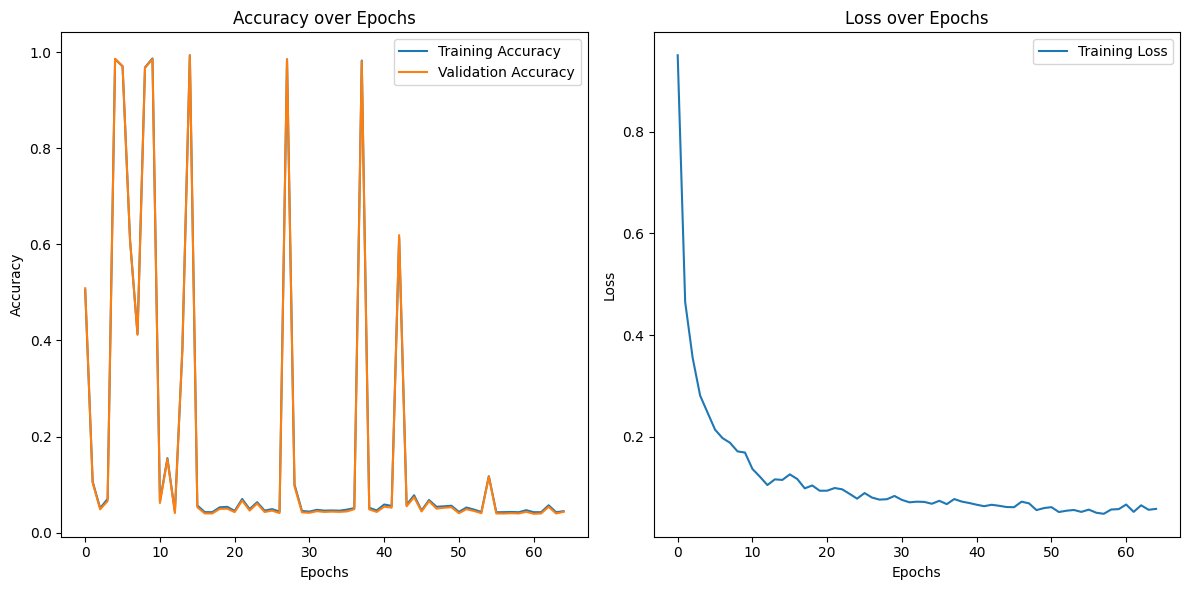

In [ ]:
import pandas as pd
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the preprocessed dataset splits
train_df = pd.read_csv('telematics_train.csv')
val_df = pd.read_csv('telematics_val.csv')
test_df = pd.read_csv('telematics_test.csv')

# Separate features and target
X_train = train_df.drop(columns=['NB_Claim'])  # Replace 'NB_Claim' with your target column name
y_train = train_df['NB_Claim'].astype(int) # Convert target to integer labels

X_val = val_df.drop(columns=['NB_Claim'])
y_val = val_df['NB_Claim'].astype(int) # Convert target to integer labels

X_test = test_df.drop(columns=['NB_Claim'])
y_test = test_df['NB_Claim'].astype(int) # Convert target to integer labels

# Initialize the TabNet model
tabnet_model = TabNetClassifier()

# Train the TabNet model
tabnet_model.fit(
    X_train=X_train.values, y_train=y_train.values,
    eval_set=[(X_train.values, y_train.values), (X_val.values, y_val.values)],
    eval_name=['train', 'val'],
    eval_metric=['accuracy'],
    max_epochs=100, patience=50,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)

# Evaluate the model on the test set
y_pred = tabnet_model.predict(X_test.values)
test_accuracy = accuracy_score(y_test.values, y_pred)

print(f"Test Accuracy: {test_accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test.values, y_pred))
print("Classification Report:")
print(classification_report(y_test.values, y_pred))

# Save the model
tabnet_model.save_model('tabnet_model')

# Extract history for plotting
train_losses = tabnet_model.history['loss']
train_accuracies = tabnet_model.history['train_accuracy']
val_accuracies = tabnet_model.history['val_accuracy']

# Plot accuracy over epochs
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# Plot training loss over epochs
plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.98252 | train_accuracy: 0.1862  | val_accuracy: 0.18773 |  0:00:08s
epoch 1  | loss: 0.42398 | train_accuracy: 0.04093 | val_accuracy: 0.04    |  0:00:16s
epoch 2  | loss: 0.29501 | train_accuracy: 0.03727 | val_accuracy: 0.0354  |  0:00:25s
epoch 3  | loss: 0.23145 | train_accuracy: 0.04329 | val_accuracy: 0.03973 |  0:00:32s
epoch 4  | loss: 0.20333 | train_accuracy: 0.14709 | val_accuracy: 0.14173 |  0:00:41s
epoch 5  | loss: 0.1716  | train_accuracy: 0.08201 | val_accuracy: 0.0798  |  0:00:48s
epoch 6  | loss: 0.17483 | train_accuracy: 0.04973 | val_accuracy: 0.0464  |  0:00:57s
epoch 7  | loss: 0.13744 | train_accuracy: 0.05221 | val_accuracy: 0.04873 |  0:01:05s
epoch 8  | loss: 0.13442 | train_accuracy: 0.04959 | val_accuracy: 0.04633 |  0:01:13s
epoch 9  | loss: 0.13631 | train_accuracy: 0.98864 | val_accuracy: 0.98953 |  0:01:22s
epoch 10 | loss: 0.12517 | train_accuracy: 0.06351 | val_accuracy: 0.06107 |  0:01:29s
epoch 11 | loss: 0.11599 | train_accuracy: 

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Test Accuracy: 0.9900666666666667
Confusion Matrix:
[[14276    30     7     2]
 [   78   551    23     0]
 [    2     7    21     0]
 [    0     0     0     3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     14315
           4       0.94      0.85      0.89       652
           8       0.41      0.70      0.52        30
          13       0.60      1.00      0.75         3

    accuracy                           0.99     15000
   macro avg       0.74      0.89      0.79     15000
weighted avg       0.99      0.99      0.99     15000

Successfully saved model at tabnet_model.zip


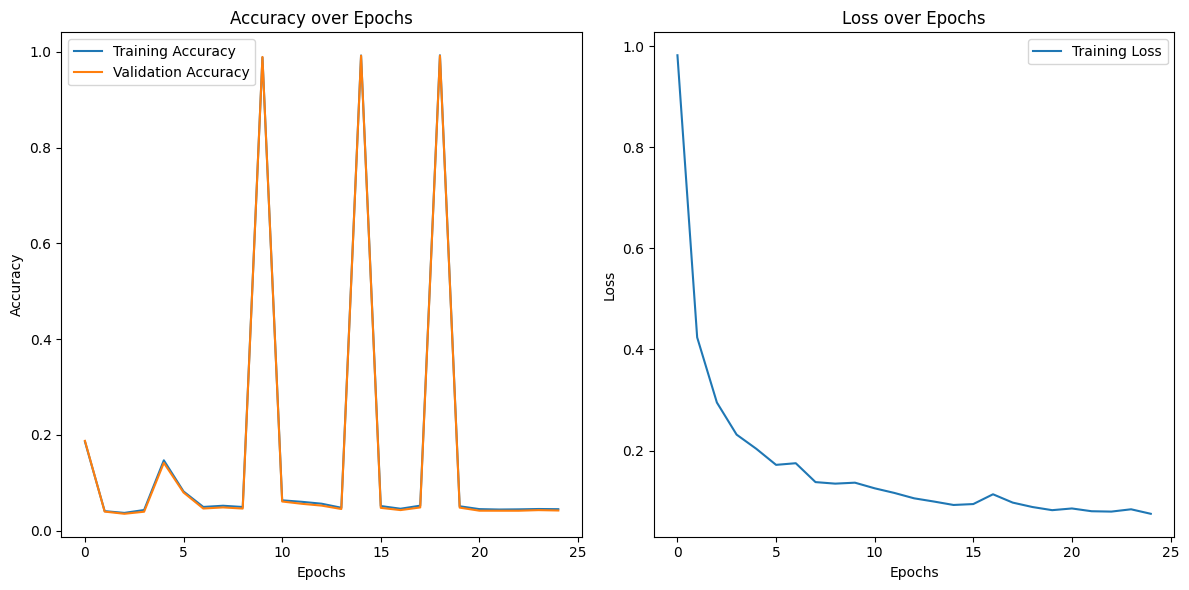

In [ ]:
import pandas as pd
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the preprocessed dataset splits
train_df = pd.read_csv('telematics_train.csv')
val_df = pd.read_csv('telematics_val.csv')
test_df = pd.read_csv('telematics_test.csv')

# Separate features and target
X_train = train_df.drop(columns=['NB_Claim'])  # Replace 'NB_Claim' with your target column name
y_train = train_df['NB_Claim'].astype(int) # Convert target to integer labels

X_val = val_df.drop(columns=['NB_Claim'])
y_val = val_df['NB_Claim'].astype(int) # Convert target to integer labels

X_test = test_df.drop(columns=['NB_Claim'])
y_test = test_df['NB_Claim'].astype(int) # Convert target to integer labels

# Normalize the data (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Initialize the TabNet model
tabnet_model = TabNetClassifier()

# Train the TabNet model
tabnet_model.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_name=['train', 'val'],
    eval_metric=['accuracy'],
    max_epochs=100, patience=10,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)

# Evaluate the model on the test set
y_pred = tabnet_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save the model
tabnet_model.save_model('tabnet_model')

# Extract history for plotting
train_losses = tabnet_model.history['loss']
train_accuracies = tabnet_model.history['train_accuracy']
val_accuracies = tabnet_model.history['val_accuracy']

# Plot accuracy over epochs
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# Plot training loss over epochs
plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.2558  | train_accuracy: 0.98041 | val_accuracy: 0.98173 |  0:00:14s
epoch 1  | loss: 0.06907 | train_accuracy: 0.99066 | val_accuracy: 0.99113 |  0:00:30s
epoch 2  | loss: 0.05221 | train_accuracy: 0.98664 | val_accuracy: 0.9862  |  0:00:45s
epoch 3  | loss: 0.04644 | train_accuracy: 0.99076 | val_accuracy: 0.99133 |  0:01:00s
epoch 4  | loss: 0.04581 | train_accuracy: 0.98033 | val_accuracy: 0.98107 |  0:01:15s
epoch 5  | loss: 0.04291 | train_accuracy: 0.80839 | val_accuracy: 0.80973 |  0:01:29s
epoch 6  | loss: 0.04123 | train_accuracy: 0.99273 | val_accuracy: 0.99247 |  0:01:44s
epoch 7  | loss: 0.0406  | train_accuracy: 0.9279  | val_accuracy: 0.93233 |  0:01:59s
epoch 8  | loss: 0.03993 | train_accuracy: 0.99294 | val_accuracy: 0.99333 |  0:02:14s
epoch 9  | loss: 0.04017 | train_accuracy: 0.9931  | val_accuracy: 0.99293 |  0:02:29s
epoch 10 | loss: 0.0393  | train_accuracy: 0.12296 | val_accuracy: 0.12113 |  0:02:44s
epoch 11 | loss: 0.03943 | train_accuracy: 

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Test Accuracy: 0.9926
Confusion Matrix:
[[14315     0     0     0]
 [   78   574     0     0]
 [    2    28     0     0]
 [    0     3     0     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     14315
           4       0.95      0.88      0.91       652
           8       0.00      0.00      0.00        30
          13       0.00      0.00      0.00         3

    accuracy                           0.99     15000
   macro avg       0.49      0.47      0.48     15000
weighted avg       0.99      0.99      0.99     15000

Successfully saved model at tabnet_model.zip


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


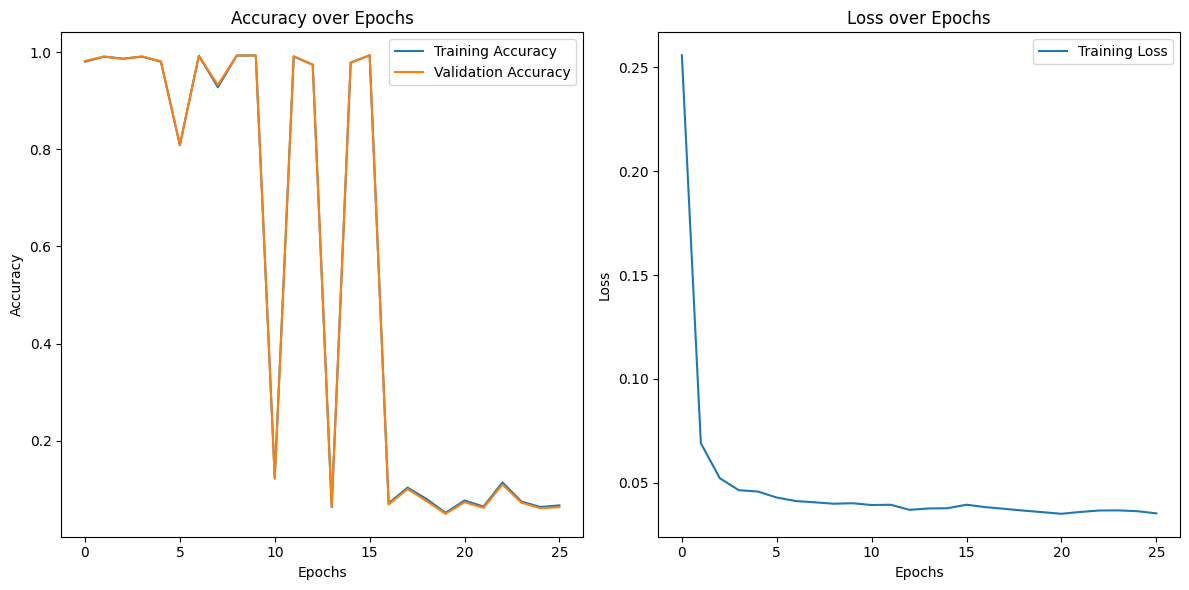

In [16]:
import pandas as pd
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch

# Load the preprocessed dataset splits
train_df = pd.read_csv('telematics_train.csv')
val_df = pd.read_csv('telematics_val.csv')
test_df = pd.read_csv('telematics_test.csv')

# Separate features and target
X_train = train_df.drop(columns=['NB_Claim'])  # Replace 'NB_Claim' with your target column name
y_train = train_df['NB_Claim'].astype(int) # Convert target to integer labels

X_val = val_df.drop(columns=['NB_Claim'])
y_val = val_df['NB_Claim'].astype(int) # Convert target to integer labels

X_test = test_df.drop(columns=['NB_Claim'])
y_test = test_df['NB_Claim'].astype(int) # Convert target to integer labels

# Normalize the data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Initialize the TabNet model with regularization and dropout
tabnet_model = TabNetClassifier(
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":10, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax',  # "sparsemax"
    n_d=16, n_a=16, n_steps=5,
    gamma=1.5, n_independent=2, n_shared=2,
    lambda_sparse=1e-3,  # Add sparse regularization
    momentum=0.3,
    clip_value=2.,  # Gradient clipping
    verbose=1
)

# Train the TabNet model with additional dropout and L2 regularization
tabnet_model.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_name=['train', 'val'],
    eval_metric=['accuracy'],
    max_epochs=100, patience=10,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

# Evaluate the model on the test set
y_pred = tabnet_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save the model
tabnet_model.save_model('tabnet_model')

# Extract history for plotting
train_losses = tabnet_model.history['loss']
train_accuracies = tabnet_model.history['train_accuracy']
val_accuracies = tabnet_model.history['val_accuracy']

# Plot accuracy over epochs
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# Plot training loss over epochs
plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.show()
